<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP6/TP6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 6: Regresión

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un algoritmo de aprendizaje automático no-supervisado que permita encontrar segmentos en clientes minoristas
## Objetivos Específicos
*   Desarrollar clustering que permite segmentar clientes en función del consumo anual de productos
*   Verificar los métodos de clustering a diferentes parámetros
*   Visualizar los resultados para distintos métodos de clustering

###Problema
El presente trabajo práctico da solución al siguiente ejercicio:

El dataset de viviendas de Boston contiene 506 observaciones y 14 variables. El objetivo de este proyecto es comprender cuál de las variables en estudio impulsan el precio de las viviendas en Boston y poder predecir los precios a partir de los atributos.
A continuación se describe a los atributos:

*   CRIM - tasa de criminalidad per cápita por ciudad
*   ZN - proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
*   INDUS - proporción de acres comerciales no minoristas por ciudad.
*   CHAS: variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)
*   NOX - concentración de óxidos nítricos (partes por 10 millones)
*   RM - número promedio de cuartos por vivienda
*   AGE - proporción de unidades ocupadas por propietarios construidas antes de 1940
*   DIS: distancias ponderadas a cinco centros de empleo de Boston
*   RAD - índice de accesibilidad a las carreteras radiales
*   TAX - tasa de impuestos sobre la propiedad de valor total por cada 10,000(dólares)
*   PTRATIO - ratio alumno-profesor por localidad
*   B - 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
*   LSTAT - % estado más bajo de la población
*   MEDV: valor medio de las viviendas ocupadas por sus propietarios en $1000

In [1]:
#Lectura de librerías
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

###1. Tratamiento de los datos

In [2]:
#Lectura de datos
data = load_boston() # reading data
#Convertir a un DataFrame
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
#Visualización de los atributos
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
#Cuenta los valores nulos para cada columna
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
#Permite obtener los estadísticos descriptivos
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Es importante conocer si existe algún tipo de asociación entre atributos, corr() describe la correlación entre atributos de la dataframe

In [7]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


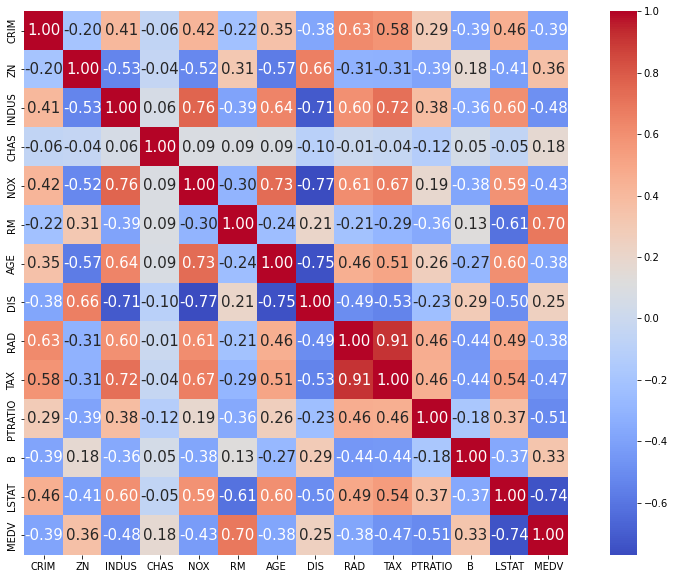

In [8]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Para una mejor interpretación se visualiza la correlación entre atributos, dando como resultado que existen columnas con multicolinealidad (TAX & RAX), por lo que debemos eliminar una columna. Pero, ¿Es seguro eliminar la columna?
Usaremos la técnica de regresión de mínimos cuadrados ordinarios(OLS)

In [9]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'MEDV ~ RAD', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           5.47e-19
Time:                        22:23:40   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
RAD           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
lm = smf.ols(formula = 'MEDV ~ TAX', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           5.64e-29
Time:                        22:23:40   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
TAX           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir de los resultados de regresión de OLS, podemos concluir que eliminar la columna "RAD" será bueno.

In [11]:
df.drop(columns = 'RAD', axis = 1, inplace = True)

###Visualiazión de histogramas y densidad para cada variable

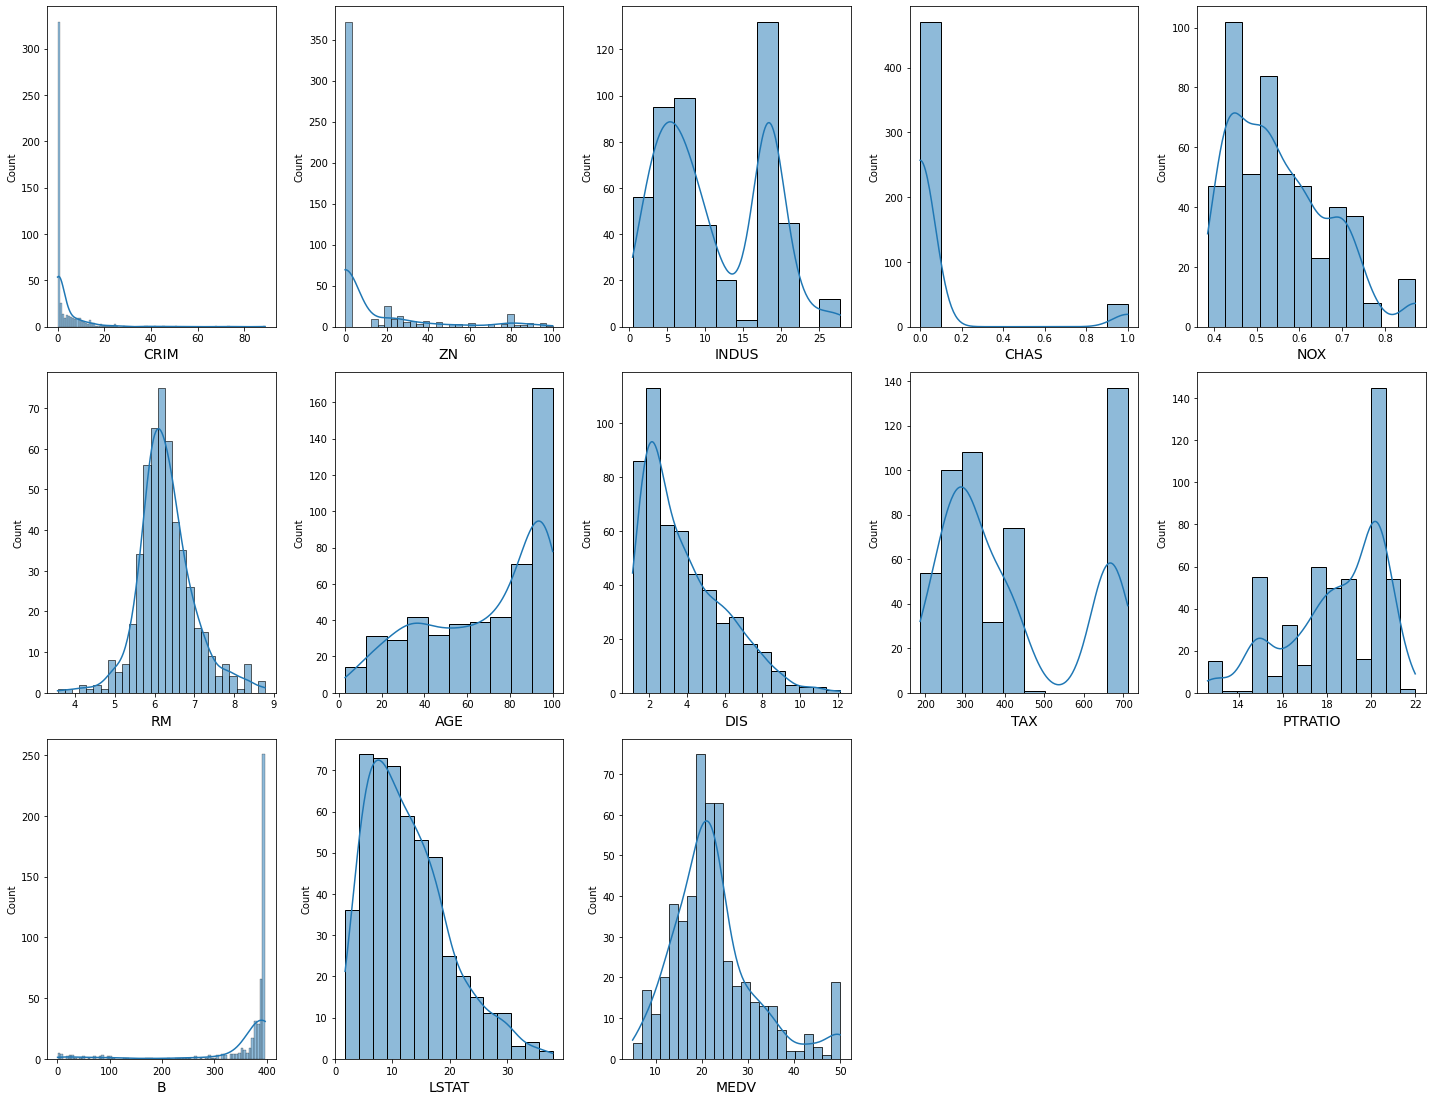

In [12]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(4, 5, plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column, fontsize = 14)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

###Visualiazión de la variable "PRECIO" respecto a cada atributo
kind = 'reg' de sns.pairplot () permite visualizar una regresión lineal para cada conjunto de datos.

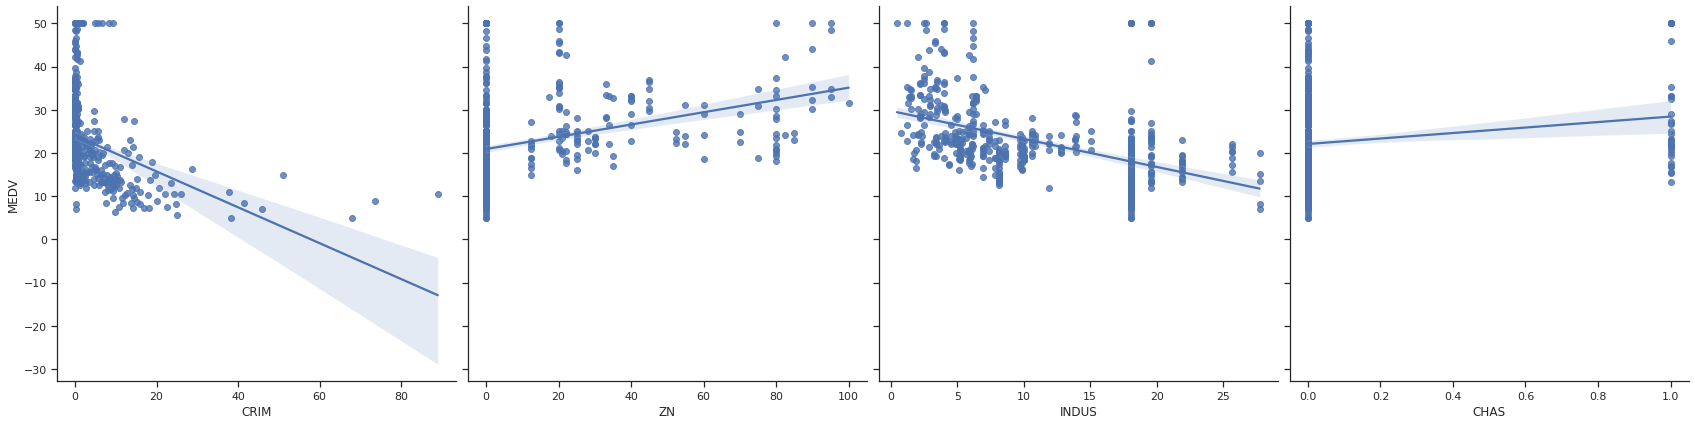

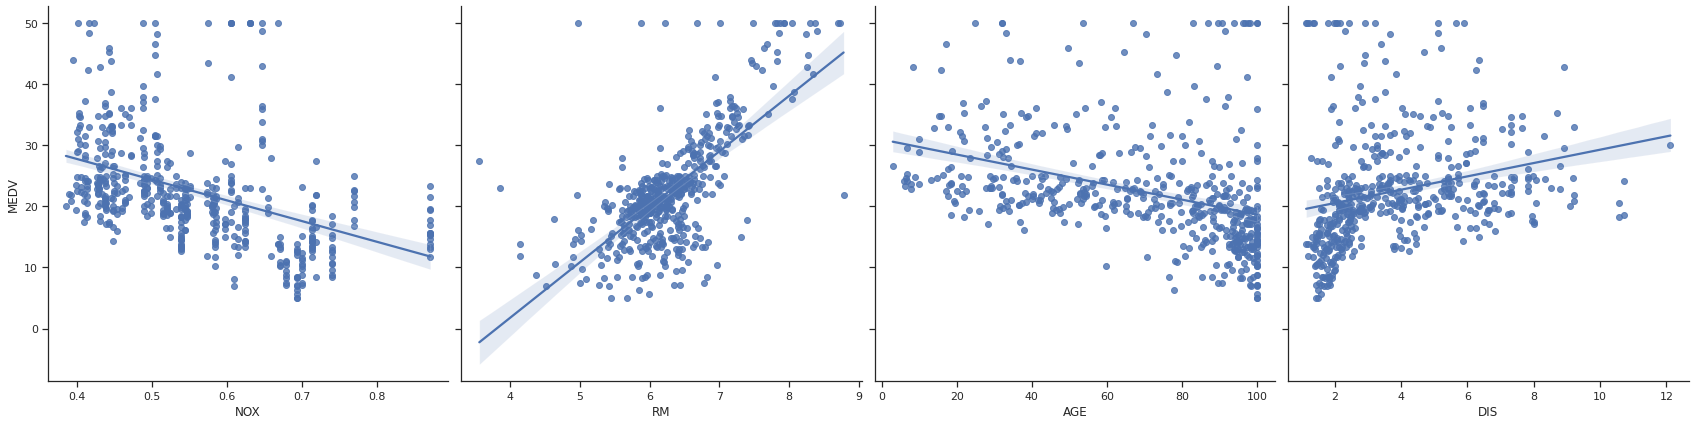

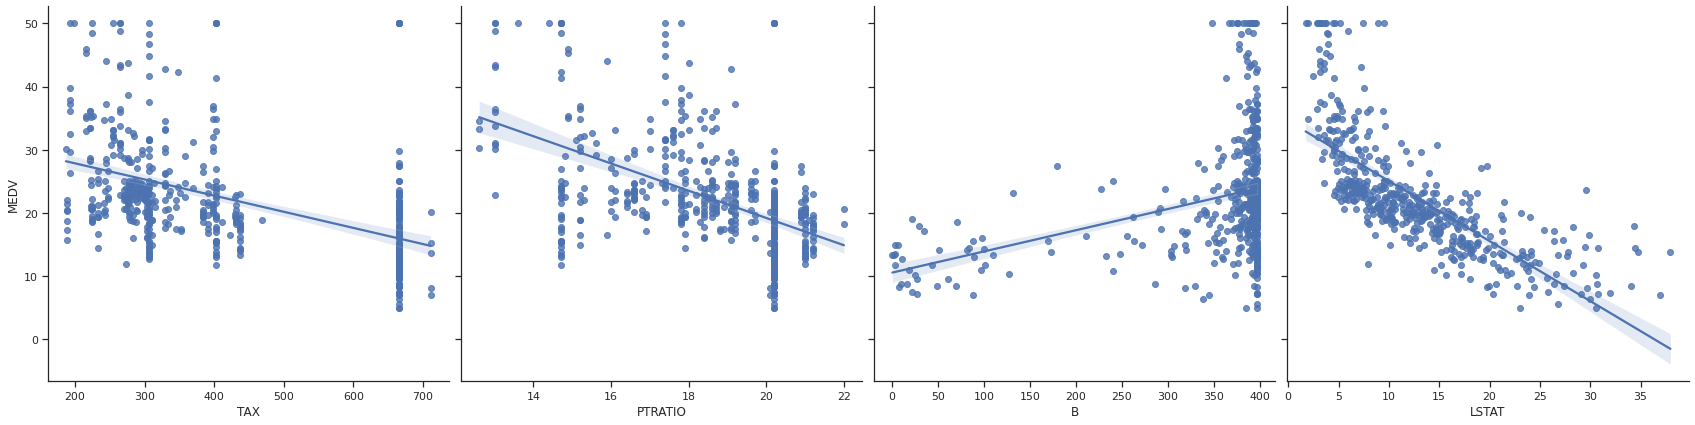

In [51]:
sns.set(style="ticks", color_codes=True)
pg = sns.pairplot(data = df, x_vars=['CRIM','ZN','INDUS','CHAS'], y_vars='MEDV',  height=6, aspect=1., kind='reg')
pg = sns.pairplot(data = df, x_vars=['NOX','RM','AGE','DIS'], y_vars='MEDV',  height=6, aspect=1., kind='reg')
pg = sns.pairplot(data = df, x_vars=['TAX','PTRATIO','B','LSTAT'], y_vars='MEDV',  height=6, aspect=1., kind='reg')

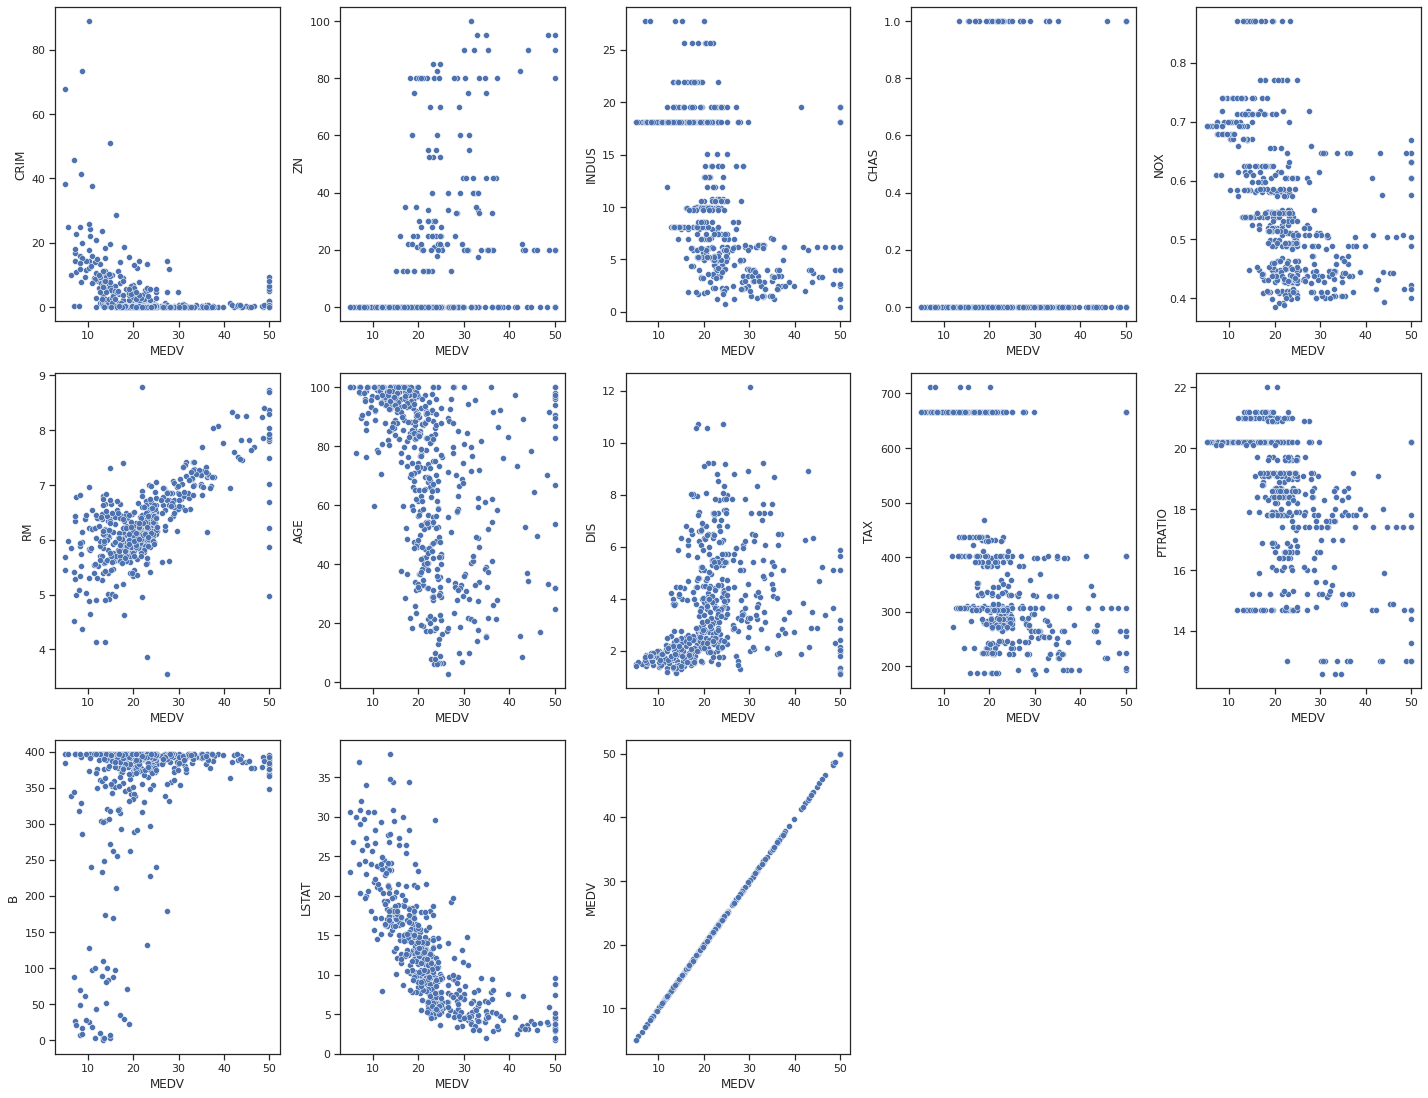

In [43]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(4, 5, plotnumber)
        sns.scatterplot(x = df['MEDV'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

###Verificación de valores atipicos utilizando box plot

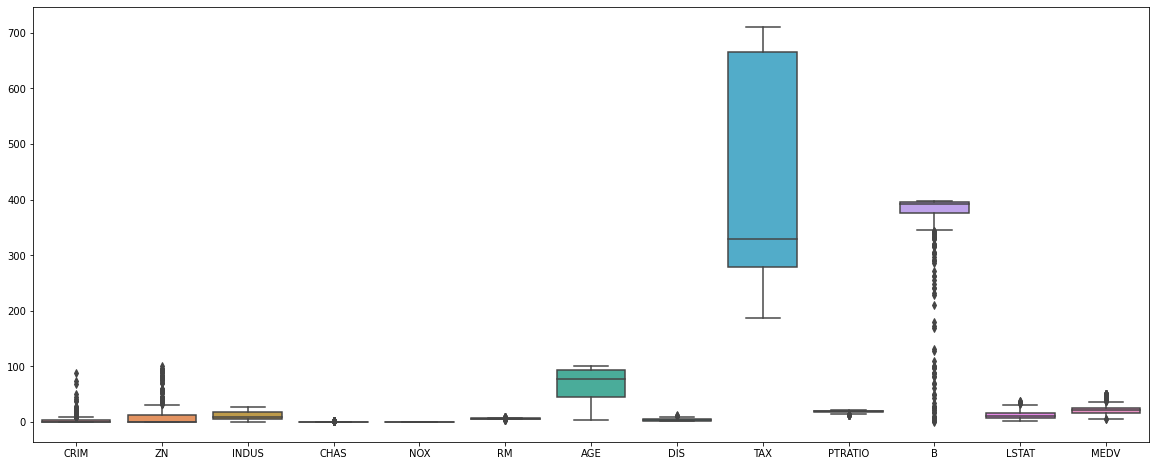

In [15]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

###Escalamiento de datos de datos
Es importante eliminar valores atípicos en los datos y trabajar a una misma escala.

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###2. Regresión

###2.1. Entrenamiento del clasificador
Para mejorar los resultados del clasificador, se realiza un proceso de entrenamiento, para ello, el usuario debe seleccionar el porcentaje de datos que se utilizará en el entrenamiento.

In [17]:
#@title Seleccione el procentaje de entrenamiento { run: "auto" }
test_size1 = 0.3 #@param {type:"slider", min:0, max:1, step:0.1}
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size1, random_state = 0)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 354 datos para entrenamiento y 152 datos para prueba


###2.2. LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7576654328884691

In [19]:
lr.score(X_test, y_test)

0.6525197139267184

In [20]:
y_pred = lr.predict(X_test)
print(f'MSE:{mean_squared_error(y_test,y_pred)} RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))} r2:{r2_score(y_test,y_pred)}')

MSE:28.933120331548462 RMSE:5.378951601525009 r2:0.6525197139267184


###¿Como influye cada variable en el precio del inmueble?


In [21]:
coef = pd.Series(data=np.round(lr.coef_,2),index = X.columns)
coef.sort_values(ascending=False)

RM         2.88
ZN         0.92
CHAS       0.74
B          0.52
TAX       -0.07
INDUS     -0.37
AGE       -0.40
CRIM      -0.76
NOX       -1.57
PTRATIO   -2.01
DIS       -3.16
LSTAT     -3.48
dtype: float64

Las variables que dan mayor valor a la vivienda son RM, ZN, CHAS, B, teniendo mayor valor el número de habitaciones, el resto de variables reducen el precio del inmueble.

###2.3. Lasso Regression

In [22]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_
alpha

0.00678043257957984

In [23]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.00678043257957984)

In [24]:
lasso.score(X_train, y_train)

0.7576554395707438

In [25]:
lasso.score(X_test, y_test)

0.6526019595347501

###Lasso Regression interactivo con el usuario
Una vez probado el regresor, solicitaremos al usuario elegir el cv y max_iter con el que desea evaluar

In [26]:
#@title Selección de valores { run: "auto" }
cv = 2 #@param {type:"slider", min:1, max:12, step:1}
max_iter = 78000 #@param {type:"slider", min:0, max:100000, step:1000}
lasso_cv = LassoCV(cv = cv, max_iter = max_iter)
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_
lasso = Lasso(alpha = lasso_cv.alpha_)
ls = lasso.fit(X_train, y_train)
print('Precisión entrenamiento: {}'.format(lasso.score(X_train, y_train)))
print('Precisión prueba: {}'.format(lasso.score(X_test, y_test)))
y_pred = ls.predict(X_test)
print(f'MSE:{mean_squared_error(y_test,y_pred)} RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))} r2:{r2_score(y_test,y_pred)}')

Precisión entrenamiento: 0.7563656103047853
Precisión prueba: 0.6523195396704985
MSE:28.94978794140897 RMSE:5.380500714748486 r2:0.6523195396704985


###2.4. Ridge Regression

In [27]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)
alpha = ridge_cv.alpha_
alpha

KeyboardInterrupt: ignored

In [ ]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

In [ ]:
ridge.score(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)

###Ridge Regression interactivo con el usuario
Una vez probado el regresor, solicitaremos al usuario elegir el cv que desea evaluar

In [ ]:
#@title Selección de valores { run: "auto" }
cv = 2 #@param {type:"slider", min:1, max:12, step:1}
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = cv, normalize = True)
ridge_cv.fit(X_train, y_train)
alpha = ridge_cv.alpha_
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print('Precisión entrenamiento: {}'.format(ridge.score(X_train, y_train)))
print('Precisión prueba: {}'.format(ridge.score(X_test, y_test)))
y_pred = ls.predict(X_test)
print(f'MSE:{mean_squared_error(y_test,y_pred)} RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))} r2:{r2_score(y_test,y_pred)}')

###2.5. Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
elastic_net_cv.fit(X_train, y_train)

In [ ]:
alpha = elastic_net_cv.alpha_
alpha

In [ ]:
elastic_net_cv.l1_ratio

In [ ]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

In [ ]:
elastic_net.score(X_train, y_train)

In [ ]:
elastic_net.score(X_test, y_test)

###Elastic Net interactivo con el usuario
Una vez probado el regresor, solicitaremos al usuario elegir el cv y max_iter con el que desea evaluar

In [ ]:
#@title Selección de valores { run: "auto" }
cv = 3 #@param {type:"slider", min:1, max:12, step:1}
max_iter = 78000 #@param {type:"slider", min:0, max:100000, step:1000}

elastic_net_cv = ElasticNetCV(alphas = None, cv = 2, max_iter = max_iter, normalize = True)
elastic_net_cv.fit(X_train, y_train)
alpha = elastic_net_cv.alpha_
elastic_net_cv.l1_ratio
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

print('Precisión entrenamiento: {}'.format(elastic_net.score(X_train, y_train)))
print('Precisión prueba: {}'.format(elastic_net.score(X_test, y_test)))
y_pred = elastic_net.predict(X_test)
print(f'MSE:{mean_squared_error(y_test,y_pred)} RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))} r2:{r2_score(y_test,y_pred)}')